In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

# URL mục tiêu cho khu vực Hà Đông
base_url = "https://mogi.vn/ha-noi/quan-ha-dong/mua-nha"

# Danh sách dữ liệu thu thập
data = []

# Các từ khóa để tìm kiếm số tầng
floors_keywords = ['T', 'tầng']

# Danh sách tên đường đã loại bỏ từ "Đường," "Khu đô thị," và "Phố"
street_names = [
    "Phan Đình Giót", "An Hòa", "Ao Sen", "Ba La", "Bà Triệu",
    "Bạch Đằng", "Vạn Phúc", "Bạch Thái Bưởi", "Bế Văn Đàn", "Bùi Bằng Đoàn",
    "Cao Thắng", "Cầu Am", "Cầu Đơ 1", "Cầu Tuân", "Chiến Thắng",
    "Chu Văn An", "Chung cư La Khê", "Nhà NC2", "Cổng Ngõ Bắc", "CT 7B",
    "Đa Sỹ", "Đại An", "Đinh Tiên Hoàng", "Do Lộ", "Động Lãm",
    "Phú Lương", "19-5", "Chiến Thắng", "Chợ", "Đất",
    "làng Nhân Trạch", "Thanh Lãm", "Hà Trì", "Hoàng Diệu",
    "Hoàng Hạnh", "Hoàng Hoa Thám", "Hoàng Văn Thụ", "Hữu Hòa",
    "Hữu Hưng", "Huỳnh Thúc Kháng", "Dương Nội", "Xa La",
    "Khối Độc Lập", "Mỗ Lao", "Xa La", "Văn Khê",
    "Văn Phú", "Văn Quán", "Vinaconex", "Xa La",
    "Khu Đồng Dưa", "Kiến Hưng", "Làng La Dương", "Làng Việt Kiều Châu Âu",
    "Lê Hồng Phong", "Lê Hữu Trác", "Lê Lai", "Lê Lợi", "Lê Quý Đôn",
    "Lê Trọng Tấn", "Lê Văn Lương kéo dài", "Liền kề 9", "Lương Ngọc Quyến",
    "Lương Văn Can", "Lý Thường Kiệt", "Lý Tự Trọng", "Man bồi gốc găng",
    "Mậu Lương", "Minh Khai", "Mỗ Lao", "Mười Chín Tháng Năm",
    "2 Chiến Thắng", "2 Lê Trọng Tấn", "2 Trần Phú", "4 An Hòa",
    "5, Khu Hà Trì 5", "6 Chiến Thắng", "6 Lê Trọng Tấn", "8 Tản Đà",
    "8 Tô Hiệu", "Ao Sen", "Bắc", "Ngô Gia Khảm", "Ngô Gia Tự",
    "Ngô Quyền", "Ngô Thì Nhậm", "Ngô Thì Sỹ", "Nguyễn Công Trứ",
    "Nguyễn Khuyến", "Nguyễn Thái Học", "Nguyễn Thượng Hiền",
    "Nguyễn Trãi", "Nguyễn Văn Lộc", "Nguyễn Văn Trỗi", "Nguyễn Văn Trỗi",
    "Nguyễn Viết Xuân", "Nhuệ Giang", "Phan Bội Châu", "Phan Chu Trinh",
    "Phan Đình Giót", "Phan Đình Phùng", "Phan Huy Chú",
    "Lụa", "Phố Thanh Bình", "Xốm", "Phú Lãm", "Phú Lương",
    "Phùng Hưng", "Phượng Bãi", "Biên Giang", "Quang Trung", "Quốc lộ 6",
    "Quốc lộ 21B", "Tản Đà", "Tây Sơn", "Thanh Bình", "Thượng Mạo",
    "Tiểu khu CN SimCo Sông Đà", "Tỉnh lộ 70", "Tỉnh lộ 70", "Tô Hiến Thành",
    "Tô Hiệu", "Tô Hiệu", "Tố Hữu", "Tôn Hiến Thành", "Trần Đăng Ninh",
    "Trần Hưng Đạo", "Trần Phú", "Trần Văn Chuông", "Trinh Lương",
    "Trưng Nhị", "Trưng Trắc", "Trương Công Định", "TTTM", "Văn Khê",
    "Văn Phú", "Vạn Phúc", "Văn Quán", "Văn Yên", "Võ Thị Sáu",
    "Yên Nghĩa", "Yên Phúc", "Yết Kiêu"
]

# Hàm để lấy số tầng và tên đường từ tiêu đề
def extract_floor_and_street(title):
    # Tìm số tầng
    floors = None
    for keyword in floors_keywords:
        match = re.search(r'(\d+)\s*' + re.escape(keyword), title, re.IGNORECASE)
        if match:
            floors = match.group(1)
            break

    # Tìm tên đường
    street = None
    title_lower = title.lower()  # Chuyển tiêu đề sang chữ thường để so sánh
    for street_name in street_names:
        if street_name.lower() in title_lower:
            street = street_name
            break
            
    return floors, street

# Crawl trang
page = 1
while (page < 30):
    url = f"{base_url}?cp={page}"
    print(f"Đang truy cập: {url}")
    response = requests.get(url)
    
    if response.status_code == 200:
        print("Truy cập thành công trang", page)
        
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Tìm tất cả các mục bất động sản
        listings = soup.find_all('li')  # Tìm tất cả các <li> trong <ul class="props">
        print(f"Số lượng mục tìm thấy: {len(listings)}")  # Debug: Kiểm tra số lượng danh sách
        
        if not listings:  # Nếu không tìm thấy mục nào, dừng lại
            print("Không còn mục nào để thu thập, kết thúc.")
            break
            
        for listing in listings:
            try:
                # Tiêu đề và địa chỉ
                title = listing.find('h2', class_="prop-title").text.strip()
                addr = listing.find('div', class_="prop-addr").text.strip()
                
                # Diện tích, số phòng ngủ, số phòng vệ sinh
                attributes = listing.find_all('ul', class_="prop-attr")[0].find_all('li')
                area = attributes[0].text.strip()  # Diện tích
                bedrooms = attributes[1].text.strip()  # Số phòng ngủ
                bathrooms = attributes[2].text.strip()  # Số phòng vệ sinh
                
                # Giá nhà
                price = listing.find('div', class_="price").text.strip()

                # Trích xuất số tầng và tên đường từ tiêu đề
                floors, street = extract_floor_and_street(title)
                
                # Lưu vào danh sách
                data.append({
                    "title": title,
                    "address": addr,
                    "area": area,
                    "bedrooms": bedrooms,
                    "bathrooms": bathrooms,
                    "price": price,
                    "floors": floors,
                    "street": street
                })
                
                # Debug: In từng mục để kiểm tra
                print(f"Tiêu đề: {title} | Địa chỉ: {addr} | Diện tích: {area} | Số phòng ngủ: {bedrooms} | Số phòng vệ sinh: {bathrooms} | Giá: {price} | Số tầng: {floors} | Tên đường: {street}")
                
            except Exception as e:
                print(f"Lỗi khi xử lý mục: {e}")
                
    else:
        print(f"Lỗi truy cập trang {page}: {response.status_code}")
        break
    
    page += 1  # Tăng số trang để tiếp tục crawl
    time.sleep(1)  # Thêm một khoảng thời gian nghỉ giữa các yêu cầu để tránh bị chặn

# Chuyển đổi dữ liệu thành DataFrame và lưu vào file CSV
df = pd.DataFrame(data)
df.to_csv("mogi_properties_ha_dong.csv", index=False, encoding='utf-8-sig')
print("Dữ liệu đã được lưu vào mogi_properties_ha_dong.csv")


Đang truy cập: https://mogi.vn/ha-noi/quan-ha-dong/mua-nha?cp=1
Truy cập thành công trang 1
Số lượng mục tìm thấy: 163
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Tiêu đề: chính chủ Bán LK mới hiện đại full nội thất thang máy nhập.KĐT Văn Phú | Địa chỉ: Quận Hà Đông, Hà Nội | Diện tích: 100 m2 | Số phòng ngủ: 7 PN | Số phòng vệ sinh: 4 WC | Giá: 16 tỷ | Số tầng: None | Tên đường: Văn Phú
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Lỗi khi xử lý mục: 'NoneType' object has no attribute 'text'
Tiêu đề: Bán nhà đường Thanh Bình, Mộ Lao, Hà Đông, 3 ô tô đỗ, tránh, DT50m2 | Địa chỉ: Quận Hà Đông, Hà Nội | Diện tích: 50 m2 | Số phòng ngủ: 4 PN | Số phòng vệ sinh: 4 WC | Giá: 14 tỷ 500 triệu | Số tầng: None | Tên đường: 

In [1]:
import pandas as pd
df = pd.read_csv('mogi_properties_ha_dong.csv')
df

,title,address,area,bedrooms,bathrooms,price,floors,street
0,chính chủ Bán LK mới hiện đại full nội thất th...,"Quận Hà Đông, Hà Nội",100 m2,7 PN,4 WC,16 tỷ,NaN,Văn Phú
1,"Bán nhà đường Thanh Bình, Mộ Lao, Hà Đông, 3 ô...","Quận Hà Đông, Hà Nội",50 m2,4 PN,4 WC,14 tỷ 500 triệu,NaN,Thanh Bình
2,"Bán nhà đường Ngô Thì Nhậm, Quang Trung, Hà Đô...","Quận Hà Đông, Hà Nội",50 m2,3 PN,3 WC,10 tỷ 350 triệu,NaN,Ngô Thì Nhậm
3,"Bán nhà đường Ngô Thì Nhậm, Quang Trung, Hà Đô...","Quận Hà Đông, Hà Nội",51 m2,3 PN,3 WC,10 tỷ 800 triệu,NaN,Ngô Thì Nhậm
4,"Bán nhà đường 19/5, Văn Quán, Hà Đông, ngõ nôn...","Quận Hà Đông, Hà Nội",34 m2,3 PN,3 WC,6 tỷ 600 triệu,NaN,Văn Quán
...,...,...,...,...,...,...,...,...
430,"Bán kiot xa la, kinh doanh mọi mặt hàng 40m2 g...","Quận Hà Đông, Hà Nội",40 m2,1 PN,1 WC,1 tỷ 750 triệu,75.0,Xa La
431,"Bán nhà Nguyễn Viết Xuân, oto đỗ cách 15m, 35m...","Quận Hà Đông, Hà Nội",35 m2,4 PN,4 WC,5 tỷ 800 triệu,4.0,Nguyễn Viết Xuân
432,"Bán nhà Mặt Phố Quang Trung, vỉa hè, kinh doan...","Quận Hà Đông, Hà Nội",105 m2,4 PN,4 WC,30 tỷ,5.0,Quang Trung
433,"Bán nhà La Khê xây mới cực đẹp, ngõ rộng, oto ...","Quận Hà Đông, Hà Nội",46 m2,4 PN,4 WC,7 tỷ 900 triệu,4.0,NaN


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import re

# 1. Tải dữ liệu
data = pd.read_csv("mogi_properties_ha_dong.csv")

# 2. Tiền xử lý dữ liệu
data.dropna(inplace=True)  # Loại bỏ các hàng có giá trị None
data.drop(columns=['title'], inplace=True)  # Loại bỏ cột title

# Chuyển đổi diện tích về m²
data['area'] = data['area'].apply(lambda x: float(re.sub(r'[^\d.]', '', x.lower())))  # Chuyển về chữ thường và loại bỏ ký tự không phải số

# Hàm chuyển đổi giá về dạng số
def convert_price(price_str):
    price_str = price_str.lower()
    total_value = 0
    
    # Xử lý phần "tỷ"
    if 'tỷ' in price_str:
        parts = price_str.split('tỷ')
        total_value += float(re.sub(r'[^\d.]', '', parts[0])) * 1e9
        if len(parts) > 1:
            price_str = parts[1]  # Xử lý phần còn lại sau "tỷ"
        else:
            price_str = ''
    
    # Xử lý phần "triệu"
    if 'triệu' in price_str:
        parts = price_str.split('triệu')
        total_value += float(re.sub(r'[^\d.]', '', parts[0])) * 1e6
    
    return total_value

# Chuyển đổi giá về dạng số
data['price'] = data['price'].apply(convert_price)

# Tiền xử lý cho cột bedrooms và bathrooms
data['bedrooms'] = data['bedrooms'].apply(lambda x: int(re.sub(r'[^0-9]', '', str(x))))  # Loại bỏ WC, PN và chuyển về số nguyên
data['bathrooms'] = data['bathrooms'].apply(lambda x: int(re.sub(r'[^0-9]', '', str(x))))  # Loại bỏ WC, PN và chuyển về số nguyên

# One-hot encoding cho cột street
streets_one_hot = pd.get_dummies(data['street'], prefix='street')
data = pd.concat([data, streets_one_hot], axis=1)

# Lấy các cột cần thiết
X = data[['area', 'bedrooms', 'bathrooms', 'floors'] + list(streets_one_hot.columns)]  # Các đặc điểm bao gồm cả đường phố
y = data['price']  # Giá nhà

# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chuẩn hóa nhãn y bằng MinMaxScaler
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [3]:
data.to_csv("gia_nha_clean.csv")

In [4]:
print(X.shape, y.shape)

(282, 58) (282, 1)


In [5]:
print(data)
data.to_csv('gia_nha_clean.csv')

                  address    area  bedrooms  bathrooms         price  floors  \
6    Quận Hà Đông, Hà Nội   402.0         6          4  1.190000e+10     3.0   
11   Quận Hà Đông, Hà Nội   352.0         3          3  1.200000e+10     5.0   
15   Quận Hà Đông, Hà Nội   702.0        13          7  1.750000e+10     7.0   
17   Quận Hà Đông, Hà Nội   522.0        13          7  1.650000e+10     7.0   
19   Quận Hà Đông, Hà Nội  3702.0         8          4  4.000000e+10     4.0   
..                    ...     ...       ...        ...           ...     ...   
429  Quận Hà Đông, Hà Nội   602.0         3          3  4.900000e+09     3.0   
430  Quận Hà Đông, Hà Nội   402.0         1          1  1.750000e+09    75.0   
431  Quận Hà Đông, Hà Nội   352.0         4          4  5.800000e+09     4.0   
432  Quận Hà Đông, Hà Nội  1052.0         4          4  3.000000e+10     5.0   
434  Quận Hà Đông, Hà Nội   332.0         3          4  6.500000e+09     5.0   

               street  street_Ao Sen  s

In [6]:
# Tiêu chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers  import  Conv1D, MaxPooling1D, Flatten
# Reshape dữ liệu cho CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 3. Xây dựng mô hình CNN với nhiều lớp
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(128, kernel_size=2, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))  # Lớp đầu ra cho dự đoán giá nhà

cnn_model.compile(optimizer=Adam(learning_rate = 0.001), loss='mean_squared_error')
cnn_model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 57, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 27, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 12, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,049 (273.63 KB)

 Trainable params: 70,049 (273.63 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0582 - val_loss: 0.0154
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0296 - val_loss: 0.0146
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0220 - val_loss: 0.0188
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0140 - val_loss: 0.0152
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0173 - val_loss: 0.0109
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0113 - val_loss: 0.0090
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0157 - val_loss: 0.0090
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0083 - val_loss: 0.0086
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0096 - val_loss: 0.0076


In [9]:
from tensorflow.keras.layers import Dense, Dropout
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Adjust based on regression or classification
])

mlp_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')  # Use 'binary_crossentropy' or 'categorical_crossentropy' for classification
mlp_history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0676 - val_loss: 0.0753
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0466 - val_loss: 0.0141
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0160 - val_loss: 0.0075
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0155 - val_loss: 0.0081
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - val_loss: 0.0059
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - val_loss: 0.0070
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0095 - val_loss: 0.0057
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - val_loss: 0.0056
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0098 - val_loss: 0.0050
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0088 - val_loss: 0.0054
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0088 - val_loss: 0.0157
E

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, Conv1D, Flatten, LSTM
# Reshape data for RNN

rnn_model = Sequential([
    SimpleRNN(128, activation='relu', recurrent_dropout=0.3, input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Adjust based on task
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0465 - val_loss: 0.0176
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0465 - val_loss: 0.0123
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0214 - val_loss: 0.0107
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0181 - val_loss: 0.0100
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0234 - val_loss: 0.0100
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0202 - val_loss: 0.0099
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0176 - val_loss: 0.0097
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0174 - val_loss: 0.0097
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0207 - val_loss: 0.0096
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0192 - val_loss: 0.0096
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0158 - val_loss: 0.0095
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0158 - val_loss: 0.0095


In [11]:
# Reshape data for LSTM

lstm_model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Adjust based on task
])

lstm_model.compile(optimizer=Adam(learning_rate = 0.0001), loss='mean_squared_error')
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0518 - val_loss: 0.0315
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0370 - val_loss: 0.0273
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0364 - val_loss: 0.0238
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0348 - val_loss: 0.0205
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0326 - val_loss: 0.0175
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0245 - val_loss: 0.0146
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0213 - val_loss: 0.0121
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0190 - val_loss: 0.0106
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0163 - val_loss: 0.0098
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0151 - val_loss: 0.0096
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0171 - val_loss: 0.0096
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0175 - val_loss: 0.009

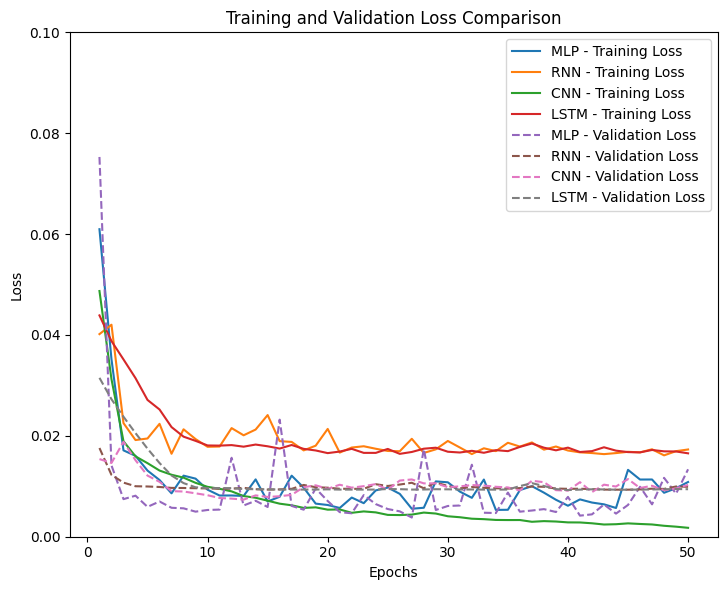

In [12]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 51)

# Plot Loss
plt.figure(figsize=(14, 6))

# Training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_history.history['loss'], label='MLP - Training Loss')
plt.plot(epochs, rnn_history.history['loss'], label='RNN - Training Loss')
plt.plot(epochs, cnn_history.history['loss'], label='CNN - Training Loss')
plt.plot(epochs, lstm_history.history['loss'], label='LSTM - Training Loss')
# Validation loss
plt.plot(epochs, mlp_history.history['val_loss'], '--', label='MLP - Validation Loss')
plt.plot(epochs, rnn_history.history['val_loss'], '--', label='RNN - Validation Loss')
plt.plot(epochs, cnn_history.history['val_loss'], '--', label='CNN - Validation Loss')
plt.plot(epochs, lstm_history.history['val_loss'], '--', label='LSTM - Validation Loss')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0.0,0.1)
# Plot Accuracy (only if it's a classification problem and accuracy is available)
if 'accuracy' in mlp_history.history:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mlp_history.history['accuracy'], label='MLP - Training Accuracy')
    plt.plot(epochs, rnn_history.history['accuracy'], label='RNN - Training Accuracy')
    plt.plot(epochs, cnn_history.history['accuracy'], label='CNN - Training Accuracy')
    plt.plot(epochs, lstm_history.history['accuracy'], label='LSTM - Training Accuracy')
    # Validation accuracy
    plt.plot(epochs, mlp_history.history['val_accuracy'], '--', label='MLP - Validation Accuracy')
    plt.plot(epochs, rnn_history.history['val_accuracy'], '--', label='RNN - Validation Accuracy')
    plt.plot(epochs, cnn_history.history['val_accuracy'], '--', label='CNN - Validation Accuracy')
    plt.plot(epochs, lstm_history.history['val_accuracy'], '--', label='LSTM - Validation Accuracy')

    plt.title('Training and Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
plt.tight_layout()
plt.show()


In [13]:
# Lưu mô hình
mlp_model.save('house_price_model.h5')
# Lưu scaler
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# Lưu danh sách vào tệp 
with open('my_list.pkl', 'wb') as f:
    pickle.dump(list(streets_one_hot.columns),f)
with open('y_scaler.pkl', 'wb') as f: pickle.dump(y_scaler, f)

In [14]:
import numpy as np
import pickle
from keras.models import load_model

# Load the model and scalers
model = load_model('house_price_model.h5')
scaler = pickle.load(open('scaler.pkl', 'rb'))
streets = pickle.load(open('my_list.pkl', 'rb'))
y_scaler = pickle.load(open('y_scaler.pkl', 'rb'))

# Get user input
area = float(input("Enter the area (m²): "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
floors = int(input("Enter the number of floors: "))
street_input = input("Enter the street name (e.g., Phan Đình Giót): ").strip()

# One-hot encode the street input
street_one_hot = [1 if street_input == street else 0 for street in streets]

# Create the feature vector
new_data = np.array([[area, bedrooms, bathrooms, floors] + street_one_hot])

# Check if the feature count is correct
print(f"Input feature count: {new_data.shape[1]}")
if new_data.shape[1] != len(streets) + 4:
    print(f"Warning: Input features count does not match the training data.")

# Scale the input data
new_data_scaled = scaler.transform(new_data)

# Make a prediction
predicted_price = model.predict(new_data_scaled)[0][0]

# Reverse the scaling for the predicted price
predicted_price_unscaled = y_scaler.inverse_transform([[predicted_price]])[0][0]

# Output the predicted price
print(f"The predicted house price is: {predicted_price_unscaled:.2f} VND")


Input feature count: 58


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
The predicted house price is: 7038929164.41 VND
